# Lending Club Case Study

## Introduction

A consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

### Goal
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### EDA done by following group members
Shabnam Sardar and Santosh Mahato

In [1]:
# Evaluation Rubric - Steps of EDA
# 1. Data Understanding
# 2. Data Cleaning and Manipulation
# 3. Data analysis
# 4. Conclusion

### Importing required libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Data Understanding - import the dataset, data dictionary and read the data

In [3]:
#Loading the dataset and data dictionary
loan = pd.read_csv('loan.csv')
data_dict = pd.read_excel('Data_Dictionary.xlsx')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)


In [4]:
loan.head() #printing 1st 5 loan dataset rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
data_dict.head() #Printing data dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [6]:
# Printing the data(first 5 rows)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Understanding - Details of the data eg. shape, unique values , duplicates, info and datatypes

In [7]:
loan.shape #number of rows and columns

(39717, 111)

In [8]:
loan.nunique().sum() # number of unique values

416800

In [9]:
loan.duplicated().sum() #we have 0 duplicates

0

In [10]:
loan.isnull().sum() #missing/null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
loan.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [12]:
loan.dtypes #datatypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [13]:
loan.describe() # describe the dataframe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
# Columns in the dataframe
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning - missing/null values for columns and rows

In [15]:
null_percentage = round(100*(loan.isnull().sum()/len(loan.index)),2)
null_percentage[null_percentage>0] #finding and printing columns more than 0% null or missing values

emp_title                           6.19
emp_length                          2.71
desc                               32.59
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [16]:
loan.drop(null_percentage[null_percentage >30].index,axis=1,inplace=True)
#Checking columns again for null value percentage
print((loan.isnull().sum()/loan.shape[0]*100).round(2).sort_values(ascending=False))

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal                     0.00
id                  

We have removed the column which contain more than 30% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [17]:
print((loan.isnull().sum(axis=1)).max()) # Checking for null values for rows , 5 is very less as compared to 37k records, hence we can ignore cleaning of rows

5


# Data Cleaning - Removing unnessary columns not required for analysis

In [18]:
#customer behaviourial columns to be removed ###recheck
loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)

# title','desc','url'e to be removed
loan=loan.drop(['title','url'],axis=1)
# funded_amnt_inv is loan amount after approval - so doesnt add much value to our analysis
loan=loan.drop(['funded_amnt_inv'],axis=1)

# member_id which is duplicate for id to be removed
loan=loan.drop(['member_id'],axis=1)

# Checking the shape of dataframe
print(loan.shape)


(39717, 28)


In [19]:
loan.columns #printing column names

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [20]:
# Finding number of unique values in each column
loan.nunique().sort_values().head(15)

tax_liens                      1
pymnt_plan                     1
initial_list_status            1
policy_code                    1
collections_12_mths_ex_med     1
chargeoff_within_12_mths       1
delinq_amnt                    1
acc_now_delinq                 1
term                           2
verification_status            3
pub_rec_bankruptcies           3
loan_status                    3
home_ownership                 5
grade                          7
emp_length                    11
dtype: int64

In [21]:
# Dropping columns with 1 unique value as they are not relevant to the analysis.
loan = loan.loc[:,loan.nunique()>1]
# Shape of the dataframe after removing columns
print(loan.shape)

(39717, 20)


In [22]:
# Final Columns in the dataframe
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

# Data Cleaning - Removing and fixing the null values for rows

In [23]:
# Checking for missing values across the dataframe
print(loan.isnull().sum().sort_values(ascending=False))

emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
zip_code                   0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


### To evaluate emp_length and pub_rec_bankruptcies to fix or remove

In [24]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [25]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [26]:
#Removing null values in emp_length and emp_title columns
loan = loan.dropna(subset = ['emp_length'])
loan = loan.dropna(subset = ['emp_title'])
print(loan.shape)

(37202, 20)


In [27]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [28]:
# Checking for missing values across the dataframe
print(loan.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


Rows fixing and removing null values has been completed, below is the final shape

In [29]:
loan.shape

(37202, 20)

# Data Cleaning - Removing duplicate rows

In [30]:
loan = loan.drop_duplicates()

loan.shape # No duplicate rows found in the dataframe

(37202, 20)

# Data Manipulation - Rectifying Data Types and creating/deriving new columns

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37202 entries, 1 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37202 non-null  int64  
 1   loan_amnt             37202 non-null  int64  
 2   funded_amnt           37202 non-null  int64  
 3   term                  37202 non-null  object 
 4   int_rate              37202 non-null  object 
 5   installment           37202 non-null  float64
 6   grade                 37202 non-null  object 
 7   sub_grade             37202 non-null  object 
 8   emp_title             37202 non-null  object 
 9   emp_length            37202 non-null  object 
 10  home_ownership        37202 non-null  object 
 11  annual_inc            37202 non-null  float64
 12  verification_status   37202 non-null  object 
 13  issue_d               37202 non-null  object 
 14  loan_status           37202 non-null  object 
 15  purpose               37

In [32]:
## Correcting data type and format for columns in the dataframe
## segregating into categories
## Derving more columns with the conversion of data type


loan.term=loan.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
#loan.zip_code=loan.zip_code.astype('category')
loan.int_rate=loan.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan.grade=loan.grade.astype('category')
loan.sub_grade=loan.sub_grade.astype('category')
loan.emp_length=loan.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan.home_ownership=loan.home_ownership.astype('category')
loan.verification_status=loan.verification_status.astype('category')
loan.issue_d=pd.to_datetime(loan.issue_d,format='%b-%y')
loan['issue_year']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.year
loan['issue_month']=pd.to_datetime(loan.issue_d,format='%b-%y').dt.month
loan.purpose=loan.purpose.astype('category')
loan.addr_state=loan.addr_state.astype('category')

In [33]:
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
term                             int64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_title                       object
emp_length                     float64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                     object
purpose                       category
zip_code                        object
addr_state                    category
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
dtype: object

In [34]:
# Rounding off to 2 decimal points
for x in loan.columns:
    if(loan[x].dtype=='float64'):
      loan[x]=loan[x].round(2)
      
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
1,1077430,2500,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,972xx,OR,17.94,0.0,2011,12
5,1075269,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12
6,1069639,7000,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,280xx,NC,23.51,0.0,2011,12


In [35]:
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
term                             int64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_title                       object
emp_length                     float64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                     object
purpose                       category
zip_code                        object
addr_state                    category
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
dtype: object

### Data Manipulation - Removing loan_status = Current , we can only perform analysis on the Completed loan or Defaulted loans, moreover Current loan status rows are very minimal

In [36]:
loan = loan[loan.loan_status!='Current']
loan.shape

(36136, 22)

As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

### FINAL selected columns for analysis
### Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year


In [37]:
loan = loan[['id','loan_amnt','term','zip_code','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
loan.shape

(36136, 18)

In [38]:
# Identifying the column as categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
num_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

# Data Manipulation - Outlier Treatment

In [39]:
## Numerical columns = loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies

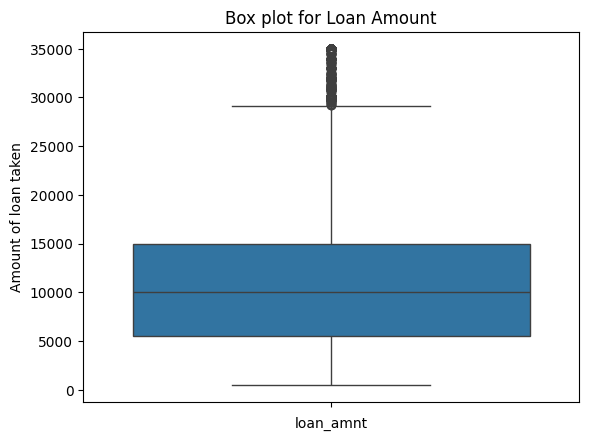

In [40]:
## loan_amnt
sns.boxplot(y=loan.loan_amnt)
plt.xlabel("loan_amnt")
plt.ylabel("Amount of loan taken")
plt.title("Box plot for Loan Amount")
plt.show()
#sns.boxplot(loan.loan_amnt)
## Upper fence ~30000 , max ~35000 so outliers wont have much impact on analysis

**Observation**: The loan amount varies from ~ 500 to 35000 with a mean of 9800.

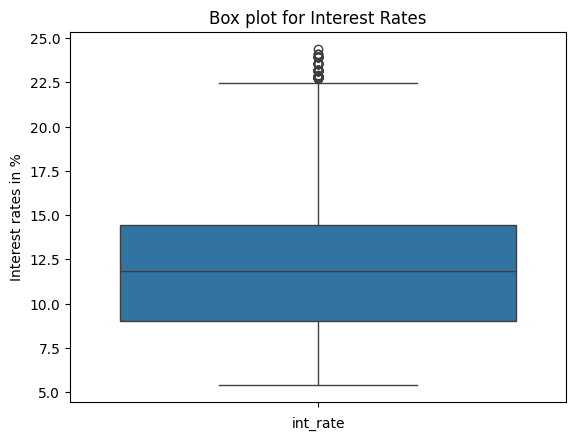

In [41]:
##int_rate
sns.boxplot(y=loan.int_rate)
plt.xlabel("int_rate")
plt.ylabel("Interest rates in %")
plt.title("Box plot for Interest Rates")
plt.show()
## Upper fence ~ 22.5 whereas max ~ 24 which is not much more than upper fence thus will not have much impact on the analysis.

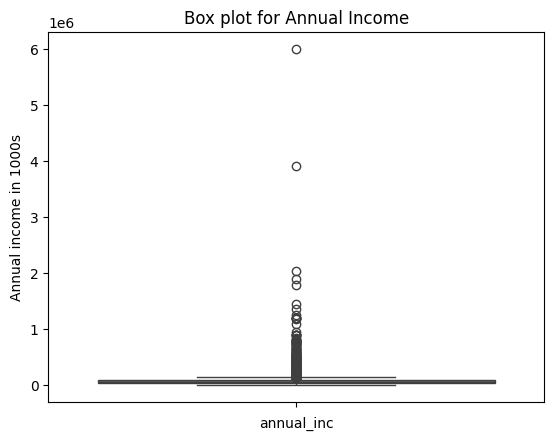

In [42]:
##annual_inc
## using plotly for interactive interaction and value retrival from chart for upper fence.
sns.boxplot(y=loan.annual_inc)
plt.xlabel("annual_inc")
plt.ylabel("Annual income in 1000s")
plt.title("Box plot for Annual Income")
plt.show()
## Upper fence ~ 145k but max ~ 6000k so we need to remove the outliers

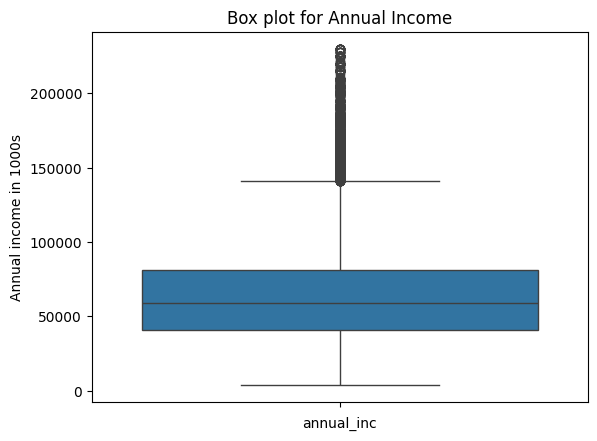

In [43]:
## Removing outliers in annual_inc greater than 99th percentile
loan = loan[loan.annual_inc<=np.percentile(loan.annual_inc,99)]
sns.boxplot(y=loan.annual_inc)
plt.xlabel("annual_inc")
plt.ylabel("Annual income in 1000s")
plt.title("Box plot for Annual Income")
plt.show()
#outliers affecting the calculations are removed now!


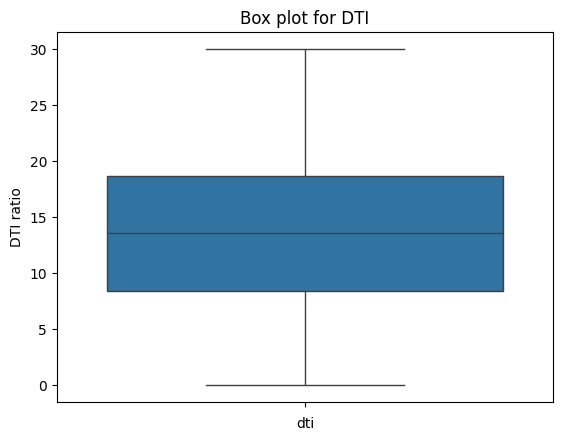

In [44]:
##dti
sns.boxplot(y=loan.dti)
plt.xlabel("dti")
plt.ylabel("DTI ratio")
plt.title("Box plot for DTI")
plt.show()
## No outliers for dti

# Data Analysis - Univariate Analysis

In [45]:
loan['loan_status'] = loan['loan_status'].astype(str)

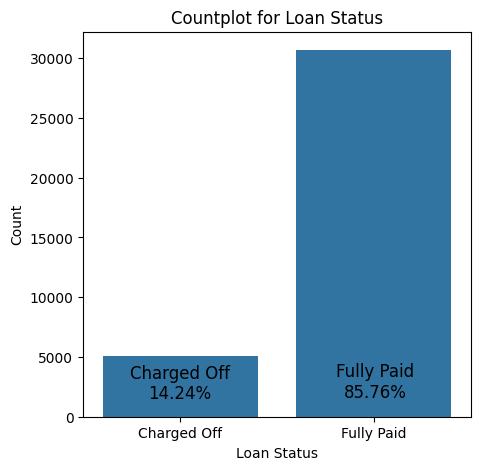

loan_status
Charged Off    14.239401
Fully Paid     85.760599
Name: proportion, dtype: float64

In [87]:
# getting the count of loan status for Fully paid and Charged off

plt.figure(figsize=(5,5))
ax=sns.countplot(x=loan.loan_status)
loan_status_percentages = loan['loan_status'].value_counts(normalize=True) * 100
loan_status_percentages = loan_status_percentages.sort_values()

for i, (label, percentage) in enumerate(loan_status_percentages.items()):
    count = loan.loan_status.value_counts()[label]
    ax.annotate(f'{label}\n{percentage:.2f}%', 
                xy=(i, 0), 
                xytext=(i, 10 + i),  # 5 points vertical offset
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=12)

# Set plot title and labels
ax.set_title('Countplot for Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')

# Show the plot
plt.show()
loan_status_percentages

**Observation:** Defaulters count are low in numbers compared to Fully Paid

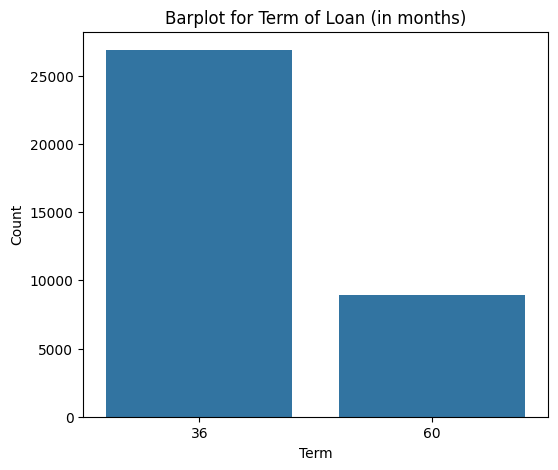

In [47]:
# Term of loan 
plt.figure(figsize=(6, 5))
sns.barplot(x=loan.term, y=loan.term.value_counts())
# Set plot title and labels
plt.title('Barplot for Term of Loan (in months)')
plt.xlabel('Term')
plt.ylabel('Count')

# Show the plot
plt.show()

**Observations**: 75% of the loan taken has term of 36 months compared to 60 months.

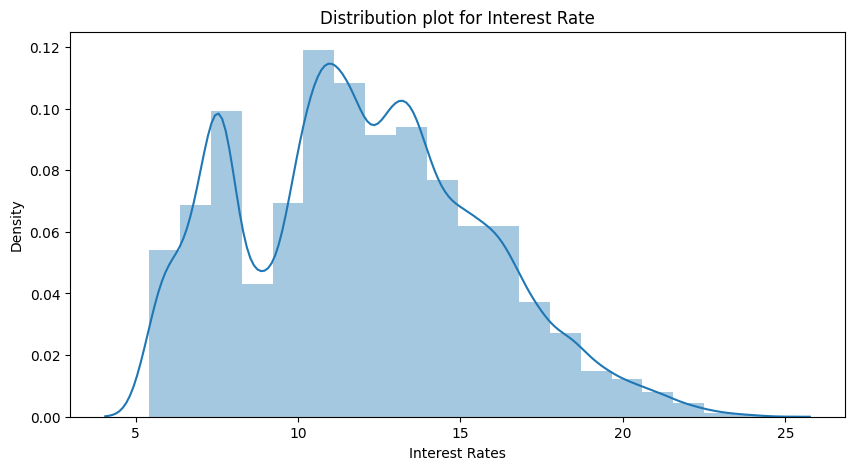

In [48]:
# Interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rates')
plt.ylabel('Density')
plt.title('Distribution plot for Interest Rate')
plt.show()

**Observations**: The interest rate is distibuted around 5-10 and 10-15

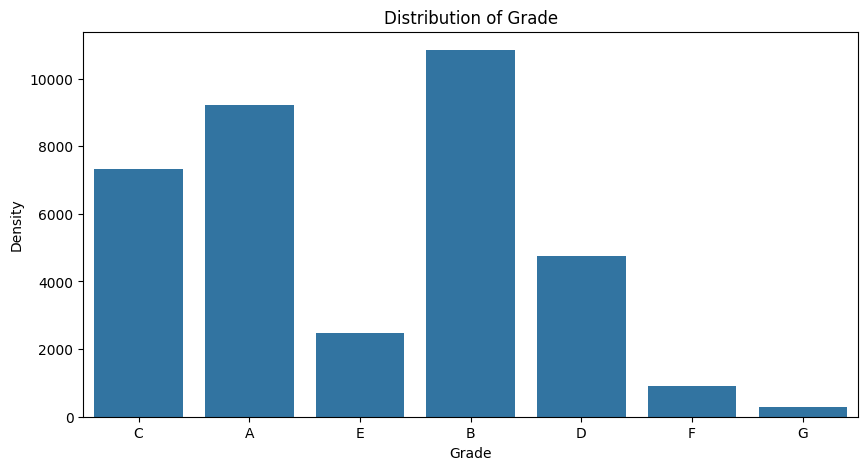

In [49]:
#Grade
plt.figure(figsize=(10,5))
loan['grade'] = loan['grade'].astype(str)
sns.countplot(data=loan,x='grade')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Observations**: A large % of loans are in grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

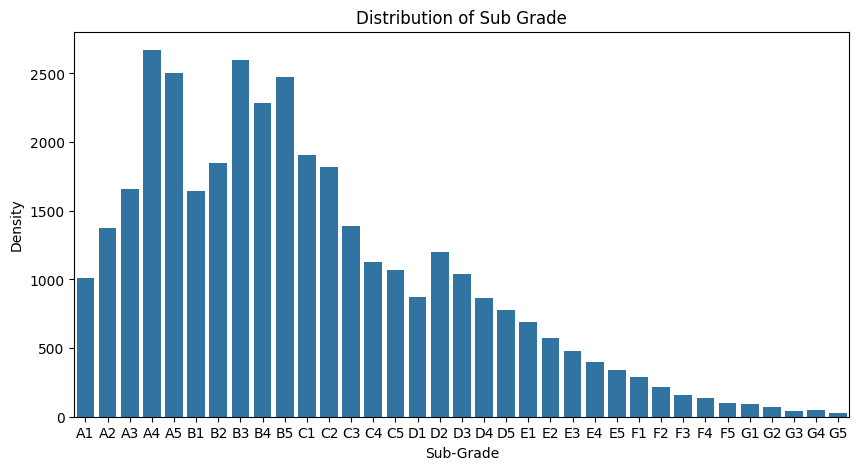

In [50]:
# Sub-Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='sub_grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Density')
plt.title('Distribution of Sub Grade')
plt.show()

**Observations**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This is same as grade distribution

#### Compare verification_status variation using hist graph across each of "defaulted", "Paid", "Current"

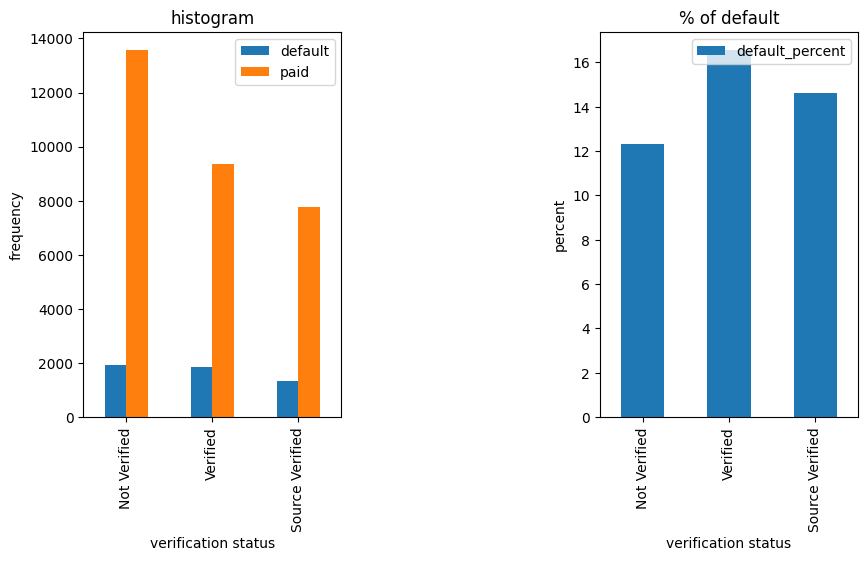

In [51]:
#  dataframe for all loan which are defaulted.
loan_c = loan[loan["loan_status"] == "Charged Off"]
#  dataframe for all loan which are fully paid.
loan_p = loan[loan["loan_status"] == "Fully Paid"]


x = loan_c["verification_status"].astype(str)
y = loan_p["verification_status"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('verification status')
ax[1].set_xlabel('verification status')
plt.show()

**observation:**
- Default count decreses with better verification status

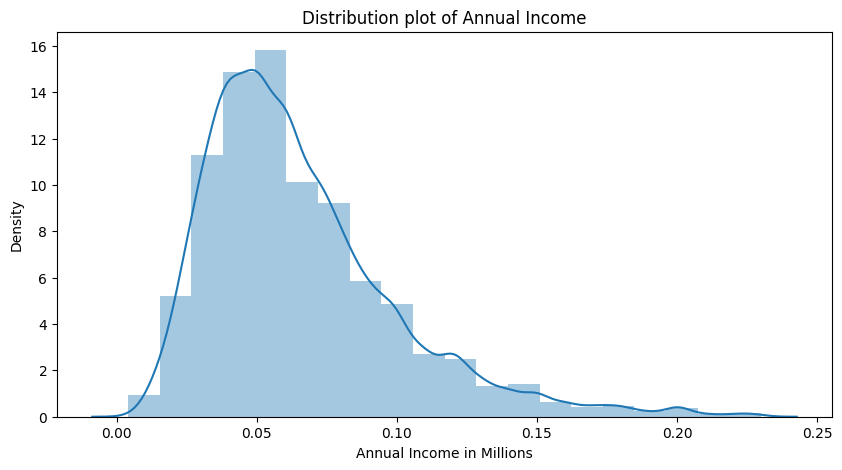

In [52]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution plot of Annual Income',fontsize=12)
plt.show()

**Observation**: Annual Income shows left sided normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

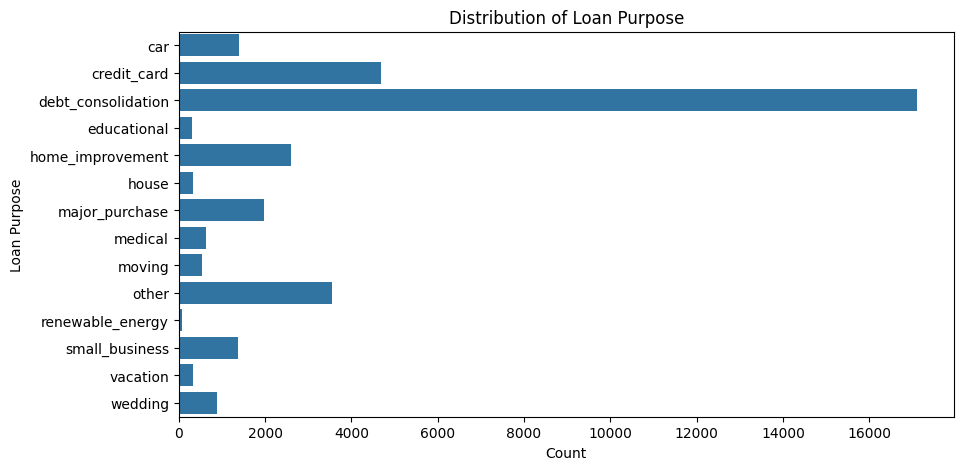

In [53]:
# loan purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan.purpose)
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Distribution of Loan Purpose',fontsize=12)
plt.show()

**Observation**:loans are taken mostly for 1.debt consolidation 2.credit card 3.Home improvement

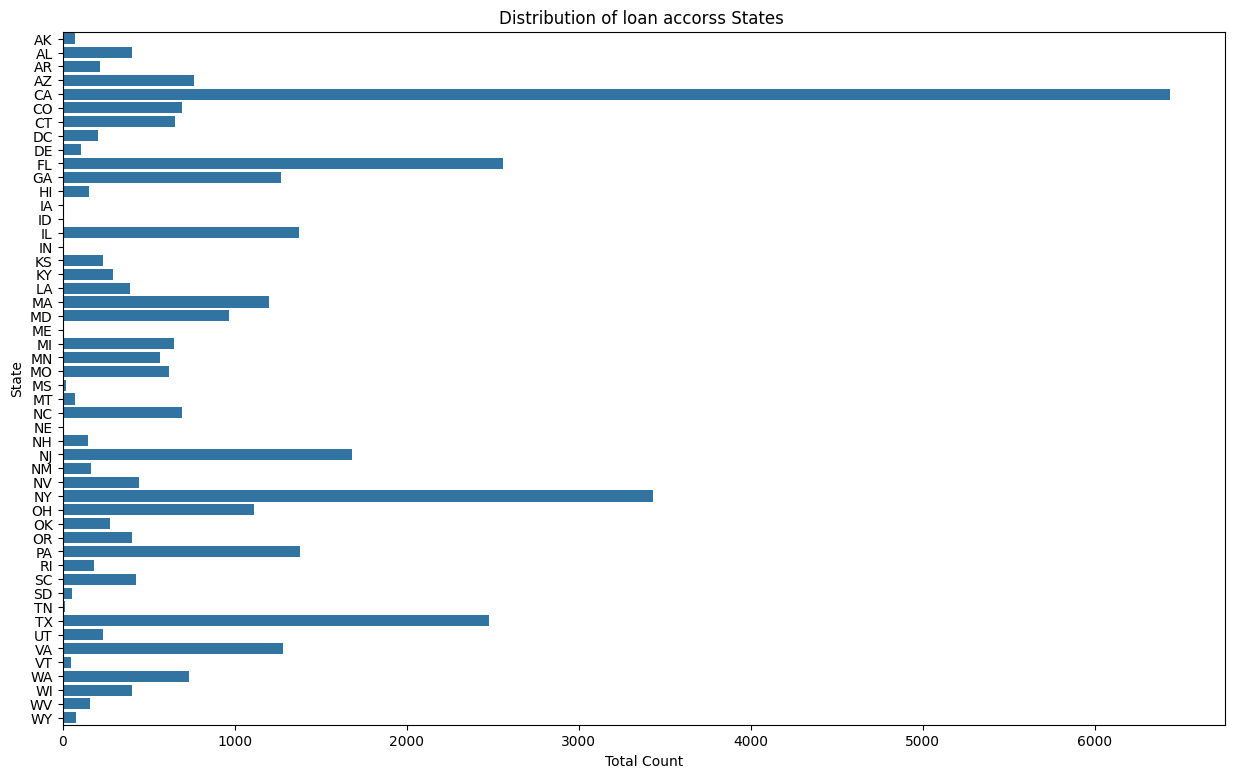

In [54]:
# States of the country
plt.figure(figsize=(15,9))
sns.countplot(y=loan.addr_state)
plt.xlabel('Total Count')
plt.ylabel('State')
plt.title('Distribution of loan accorss States ',fontsize=12)
plt.show()

**Observation**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

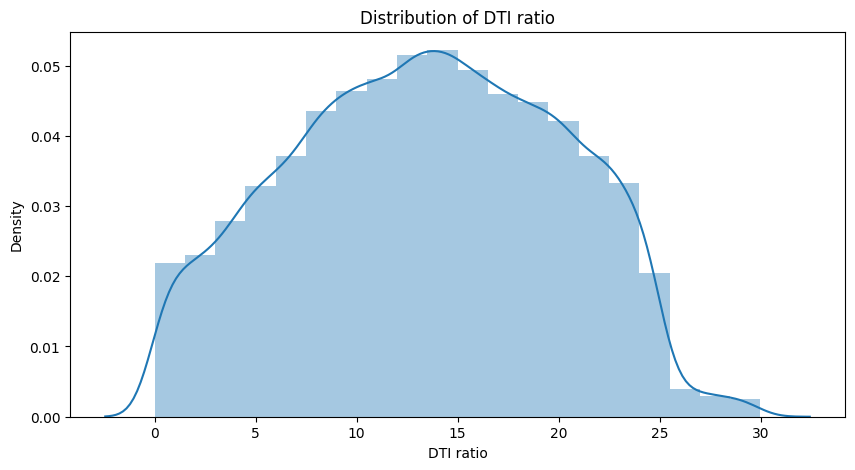

In [55]:
# dti distribution
plt.figure(figsize=(10,5))
sns.distplot(loan.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

**Observation**: Majority of the borrowers have very large debt compared to the income registerd (DTI),  in the 10-15 DTI ratio.

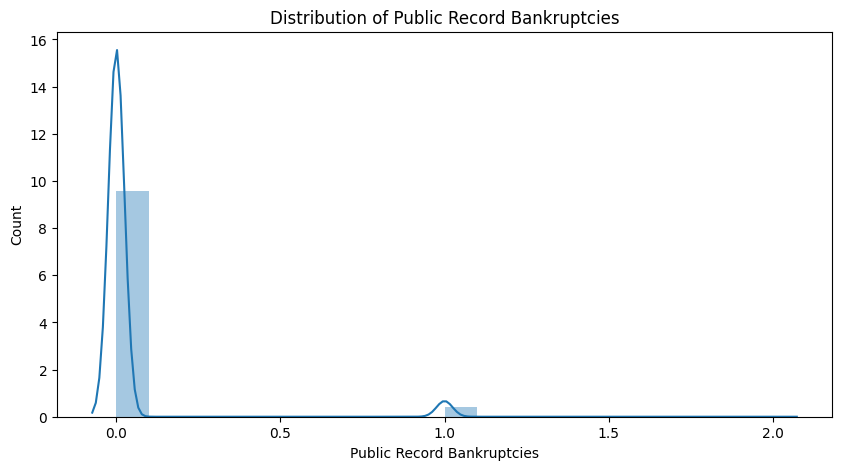

In [56]:
# pub_rec_bankruptcies
plt.figure(figsize=(10,5))
#sns.countplot(loan.pub_rec_bankruptcies)
sns.distplot(loan.pub_rec_bankruptcies,kde=True,bins=20)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

**Conclusion**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

### Segmented Univariate Analysis

#### Get seperated data for "Paid" vs "Default" data.

In [57]:
#  dataframe for all loan which are defaulted.
loan_c = loan[loan["loan_status"] == "Charged Off"]
#  dataframe for all loan which are fully paid.
loan_p = loan[loan["loan_status"] == "Fully Paid"]

#### Compare [purpose] variation using hist graph across each of "defaulted", "Paid", "Current"


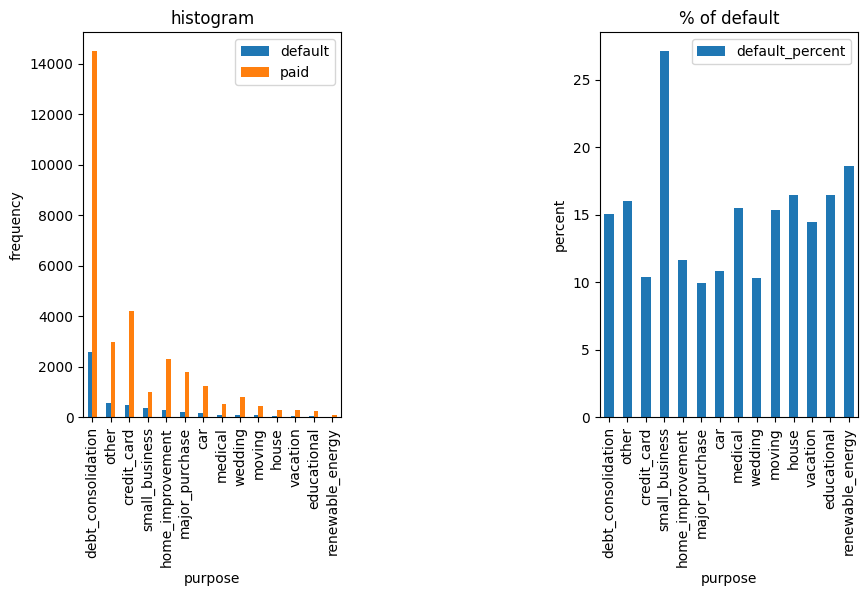

In [58]:

x = loan_c["purpose"].astype(str)
y = loan_p["purpose"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('purpose')
ax[1].set_xlabel('purpose')
plt.show()


**observation:**

- High chances of default : **debt_consolidation, small business, renewable energy**  
- Lowest chances of default :**major purchase, car, wedding**

### Compare [loan_amnt] variation using box plot and hist graph across each of "defaulted", "Paid"

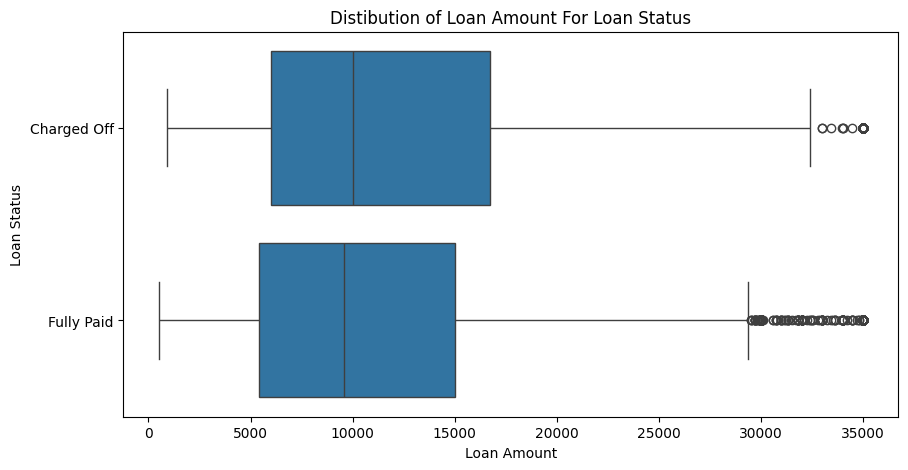

In [59]:
# loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Observation:** The mean and 25% percentile are same for both but 75% percentile in the defaulted loan is larger which indicates large amount of loan has higher chance of defaulting.

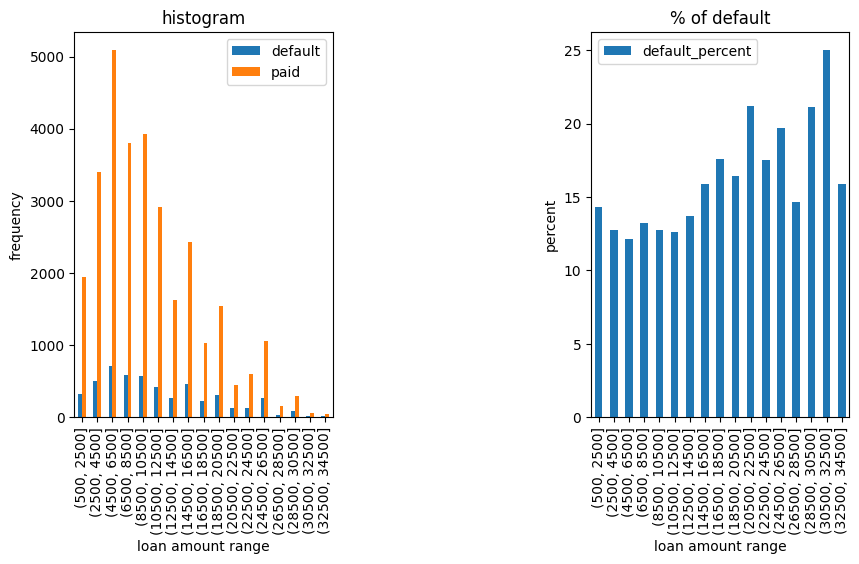

In [60]:
#Another representation for exact defaulter list


x = loan_c["loan_amnt"].astype(int)
y = loan_p["loan_amnt"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=2000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('loan amount range')
ax[1].set_xlabel('loan amount range')
plt.show()


**observation:**

- High chances of default : **"30500 - 32500"**  
- Lowest chances of default :**"4500-6500"**

#### Compare [term] variation using hist graph across each of "defaulted", "Paid", "Current"


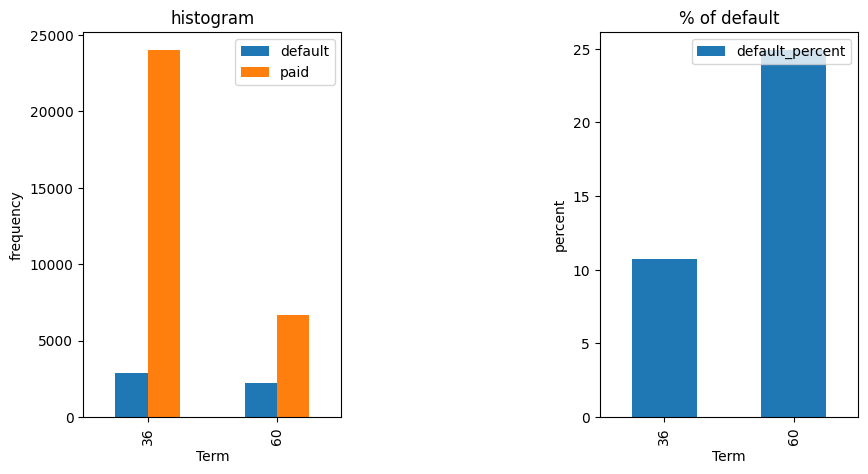

In [61]:
#Compare term variation using hist graph across each of "defaulted", "Paid", "Current"

x = loan_c["term"].astype(str)
y = loan_p["term"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('Term')
ax[1].set_xlabel('Term')
plt.show()

**observation:**
- Term with 60 month has very high chances of default

#### Compare [grade] using hist graph across each of "Defaulted" and "Paid"

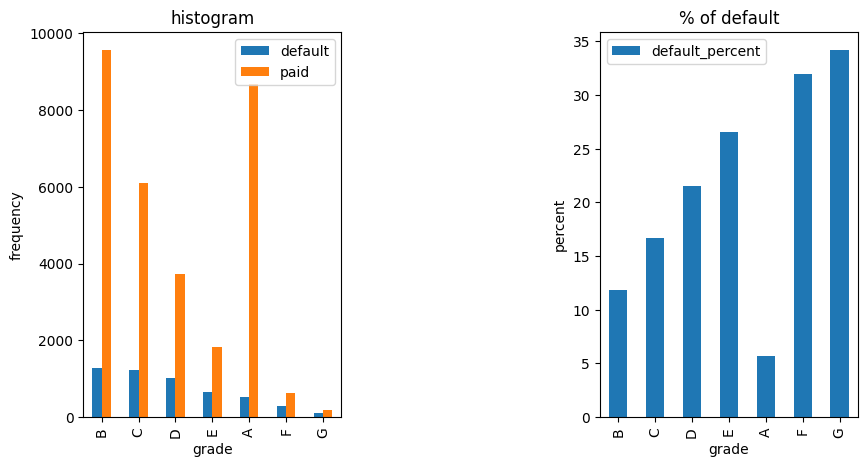

In [62]:
x = loan_c["grade"].astype(str)
y = loan_p["grade"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('grade')
ax[1].set_xlabel('grade')
    
plt.show()

**observation:**
- High chances of default : **"Grade F", " Grade G"**
- Lowest chances of default : **"Grade A"**

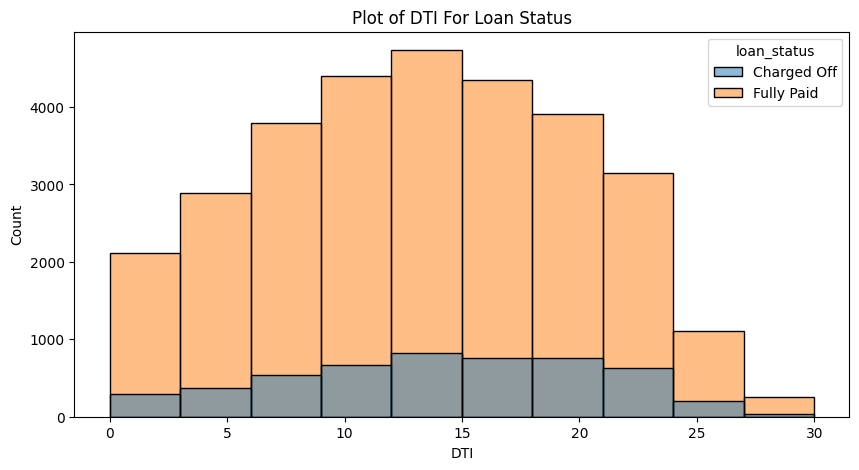

In [63]:
# DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Plot of DTI For Loan Status',fontsize=12)
plt.show()

**Observation:** The Loan Status also changes with DTI ratio,loans in DTI ratio 10-17 have higher number of default count and fully paid

#### Compare home_ownership variation using hist graph across each of "defaulted", "Paid"

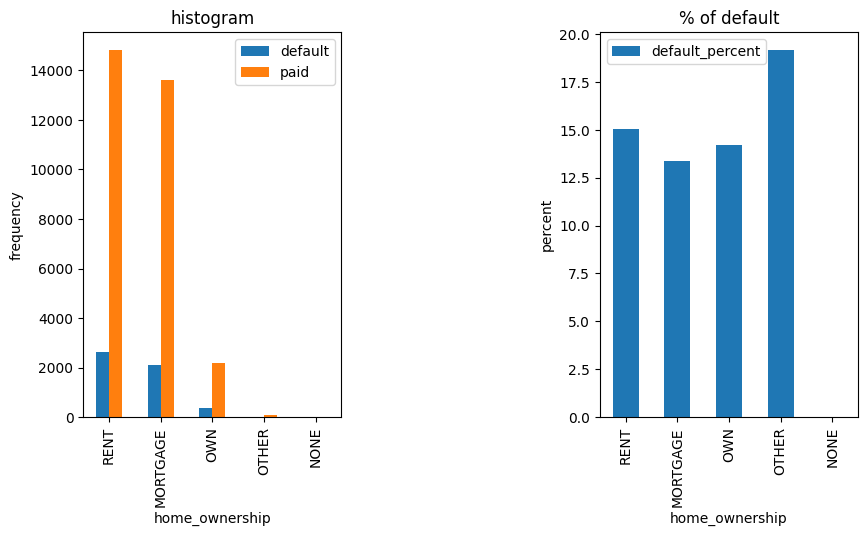

In [64]:
#Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"

x = loan_c["home_ownership"].astype(str)
y = loan_p["home_ownership"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('home_ownership')
ax[1].set_xlabel('home_ownership')
plt.show()

**Observation:** The Defaulted loan are more for Mortgage , Rent and Other Categories

#### Compare [annual_inc] variation using hist graph across each of "defaulted", "Paid", "Current"


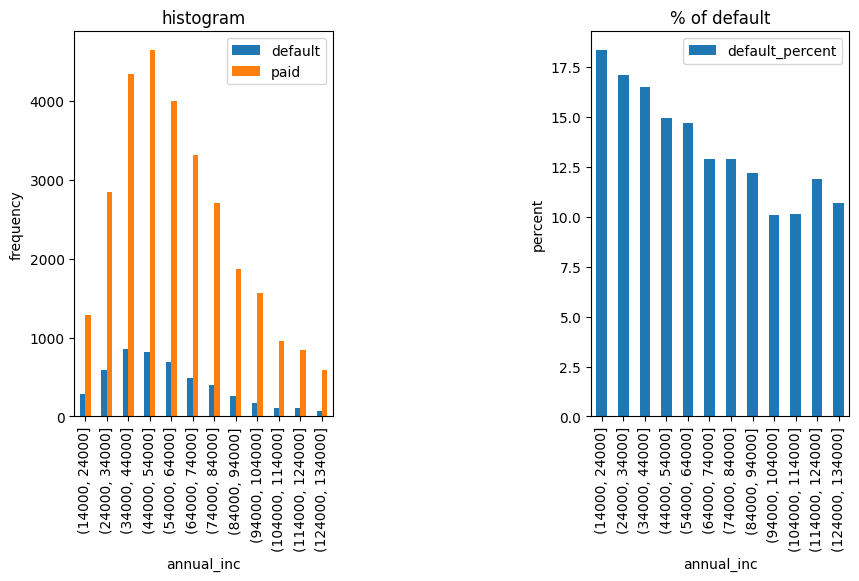

In [65]:

x = loan_c["annual_inc"].astype(int)
y = loan_p["annual_inc"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=10000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('annual_inc')
ax[1].set_xlabel('annual_inc')
plt.show()

**observation:**
- Chances of Default decreses significantly with increase in annual income but increase slighty with highst annual income

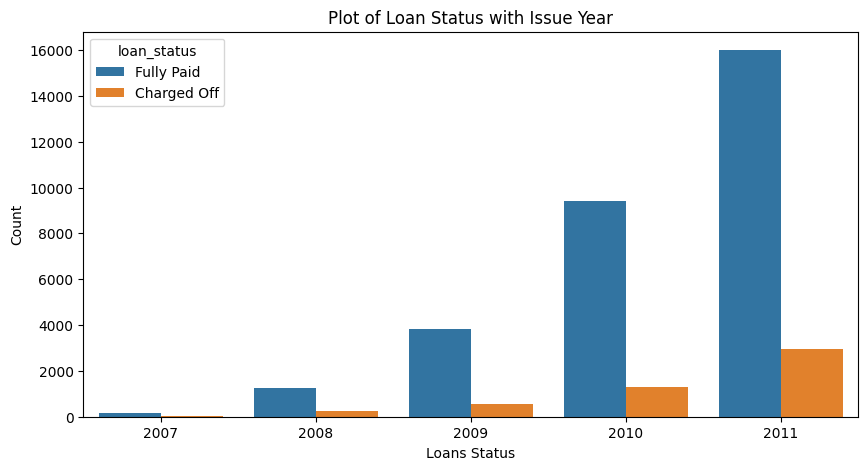

In [66]:
# loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='issue_year',hue='loan_status')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Plot of Loan Status with Issue Year',fontsize=12)
plt.show()

**Observation:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan, so lending club is doing good analysis

#### Compare [int_rate] variation using hist graph across each of "defaulted", "Paid"

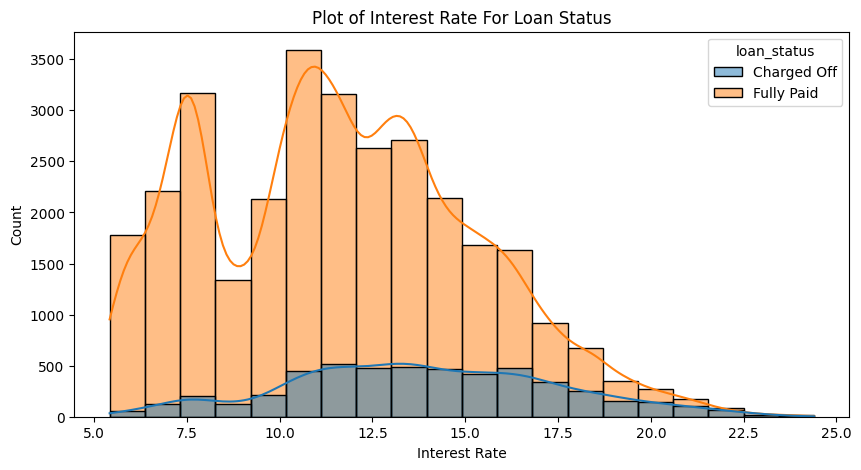

In [67]:
# int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Plot of Interest Rate For Loan Status',fontsize=12)
plt.show()

**Observation:** The default loan amount are more with interest rate 10 to 15%

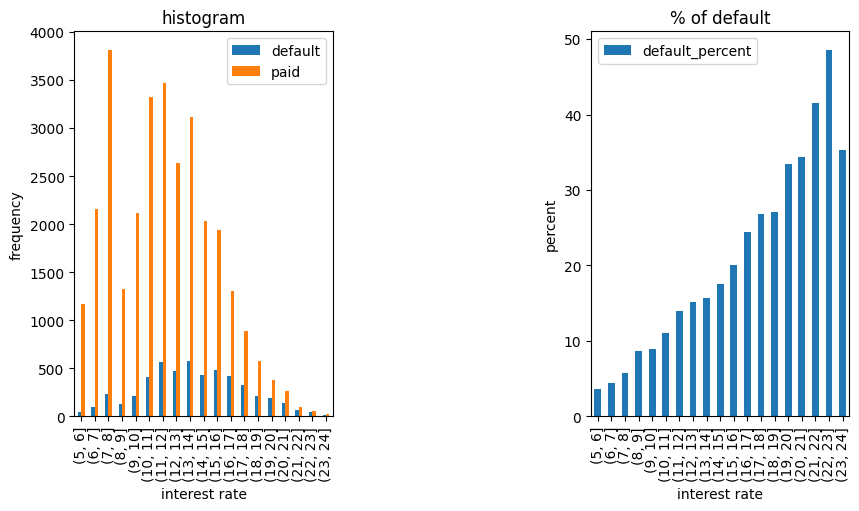

In [68]:

x = loan_c["int_rate"].astype(float)
y = loan_p["int_rate"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.linspace(start=min1,stop=max1, num=20, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('interest rate')
ax[1].set_xlabel('interest rate')
plt.show()


**observation:**  
    - Chances of default increases with increase in interest rate

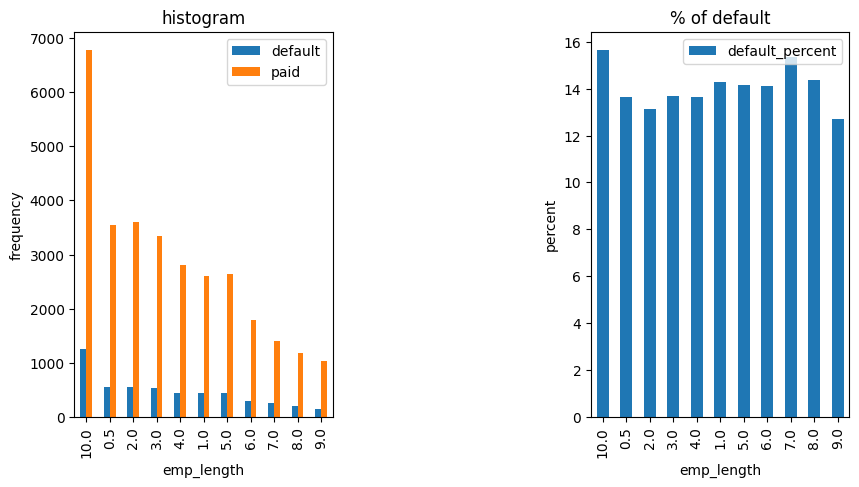

In [69]:
x = loan_c["emp_length"].dropna().astype(str)
y = loan_p["emp_length"].dropna().astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('emp_length')
ax[1].set_xlabel('emp_length')
plt.show()


**Observations**
- High chances of default : **"10+ years", "7 years"**
- Lowest chances of default : **"2 years" , "9 years"**

#### Compare [addr_state] using hist graph across each of "defaulted", "Paid"


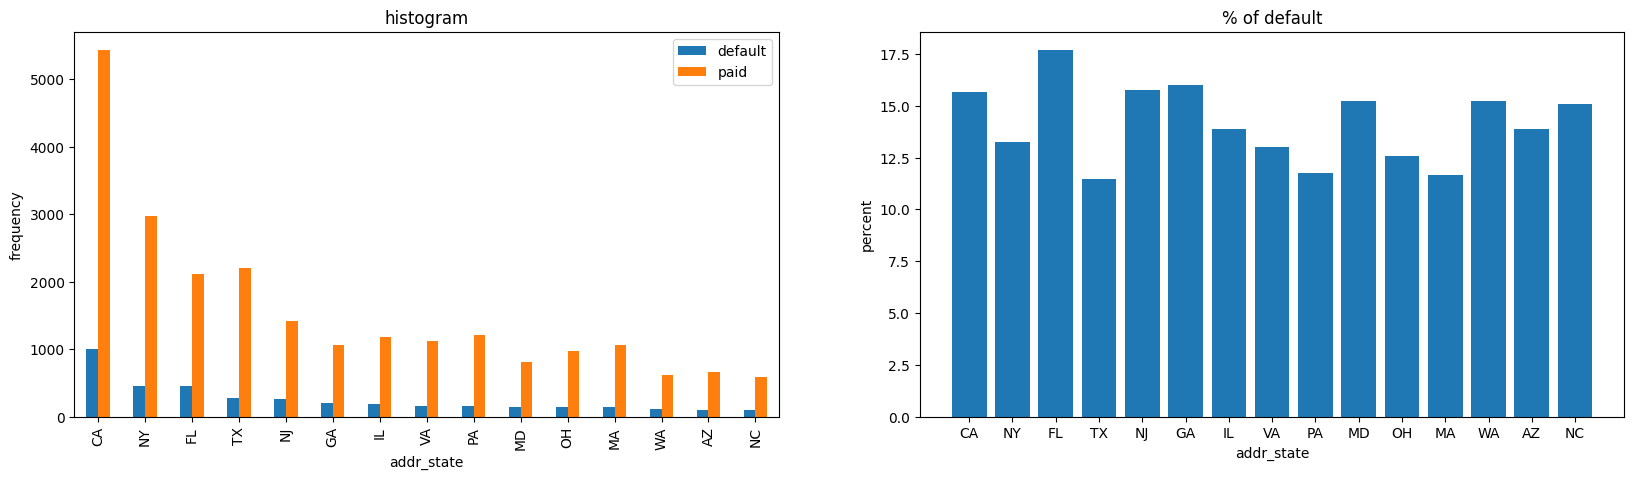

<Figure size 1400x500 with 0 Axes>

In [70]:

x = loan_c["addr_state"].astype(str)
y = loan_p["addr_state"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5));
#fig.subplots_adjust(wspace=1, hspace=0.1)
s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp = pp.loc[(pp["default"] > 100) & (pp["paid"] > 100)]
pp['index1'] = pp.index

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

    
pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
ax[1].bar(x=pp.index1,height=pp["default_percent"])


ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('addr_state')

ax[1].set_xlabel('addr_state')
plt.figure(figsize=(14, 5))
 
plt.show()

**observation:**

- High chances of default : **"NV,FL and CA"**  
- Lowest chances of default :**"TX"**

#### Compare sub_grade variation using hist graph across each of "defaulted", "Paid"

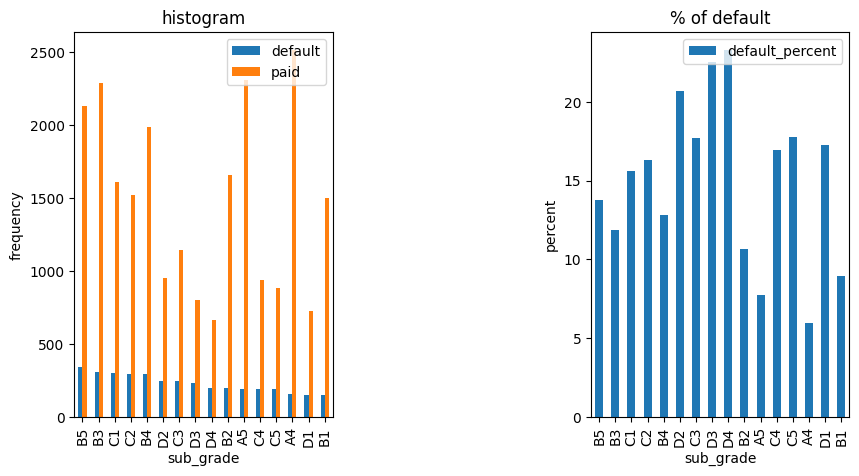

In [71]:
x = loan_c["sub_grade"].astype(str)
y = loan_p["sub_grade"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 100) & (pp["paid"] > 600)]

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('sub_grade')
ax[1].set_xlabel('sub_grade')
plt.show()


**observation:**
    
- High chances of default : **"D5 and D4"**  
- Lowest chances of default :**"A3 and A4"**

# Data Analysis - Bivariate Analysis

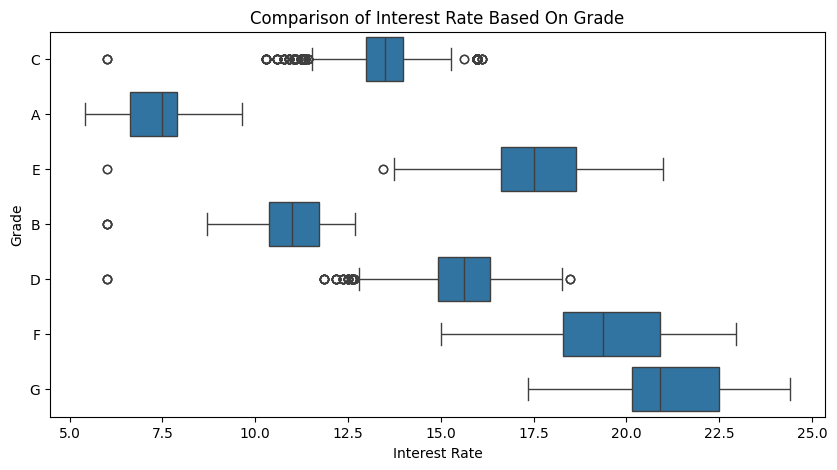

In [72]:
# Comparing of interest rate based on grade 
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Observation:** The Grade represent risk factor hence interst rate increases with the risk.

#### Compare [dti] variation using hist graph across each of "defaulted", "Paid"

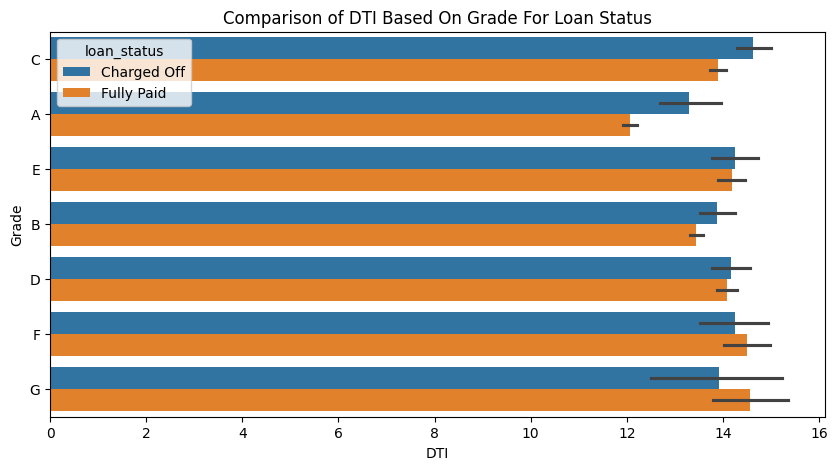

In [73]:
#  DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

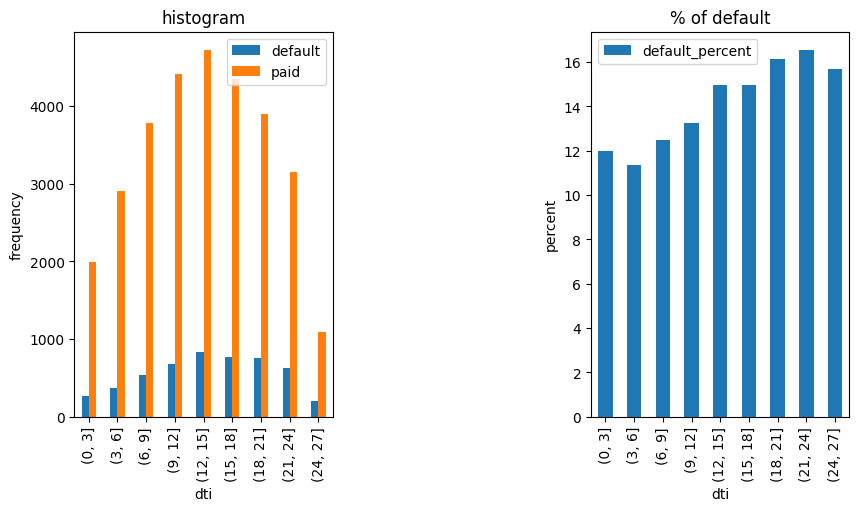

In [74]:
#Compare [dti] variation using hist graph across each of "defaulted", "Paid"

x = loan_c["dti"].astype(float)
y = loan_p["dti"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=3, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('dti')
ax[1].set_xlabel('dti')
plt.show()

**Observation:** The Grade A which is lowest risk also has lowest DTI ratio hence higher grade has higher rate of default (DTI increases
Default chance increases with increase in "Debt to income ratio"

#### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid"


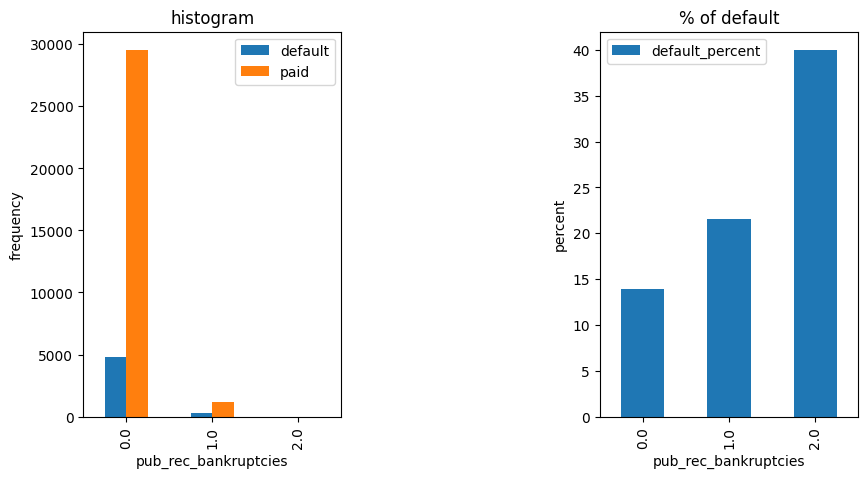

In [75]:
### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid", "Current"

x = loan_c["pub_rec_bankruptcies"].dropna().astype(str)
y = loan_p["pub_rec_bankruptcies"].dropna().astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('pub_rec_bankruptcies')
ax[1].set_xlabel('pub_rec_bankruptcies')
plt.show()

**observation:**
Chances of default increases with pub_rec_bankruprcies

## Find attributes coorelation  using heatmap


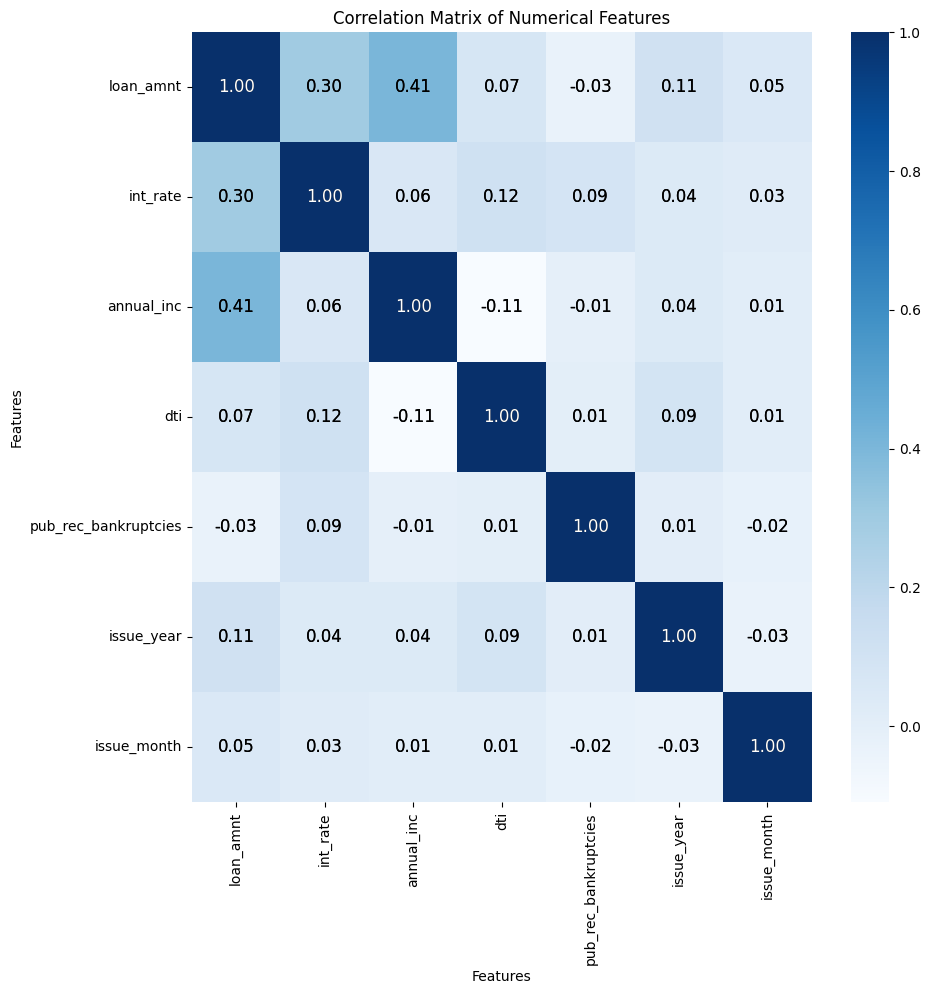

In [76]:
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']

# Extract only the numerical columns
numeric_loan = loan[num_cols]

# Calculate the correlation matrix
corr = numeric_loan.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 12, "color": "black", "va": "center", "ha": "center"}, cbar=True)

# Annotate the heatmap manually to adjust text color based on cell background
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        text_color = "white" if abs(value) > 0.5 else "black"  # Adjust threshold as needed
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=12)

plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

** Observation ** - there is good correlation with loan_amnt and annual_inc

# Conclusion


### Univariate Analysis
 - Defaulters count is 14.4% where as Fully paid is 85.6%
 - 75% of the loan is 36 months as compared to 60 months
 - A large % of loans are in grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Most of borrowsers have working experience greater than 10 years.
 - Most of borrowsers have taken loan for mortage or rent.
 - Half of the borrowers are verified by the company
 - Loans are taken mostly for debt consolidation followed by credit card.
 - Majority of borrowers have low income
 - Large number of borrowers are from the urban cities like california, new york, texas, florida where population is also more
 - Most borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Most of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - Number of loans approved increases each year

### Segmented Univariate Analysis
 - Default count decreses with better verification status
 - High chances of default : debt_consolidation, small business, renewable energy ,Lowest chances of default major purchase, car, wedding
 - The mean and 25% percentile are same for both but 75% percentile in the defaulted loan is larger which indicates large amount of loan has higher chance of defaulting.
 - High chances of default have income in the range -30500 - 32500 ,Lowest chances of default - 4500-6500
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - High chances of default fall under Grade F and Grade G , Lowest chances of default are from Grade A
 - The Defaulted loan are more for Mortgage , Rent and Other Categories
 - Chances of Default decreses significantly with increase in annual income but increase slighty with highst annual income
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan,
 - Chances of default increases with increase in interest rate
 - High chances of default is more for 10+ years and 7 years employee tenure
 - High chances of default NV,FL and CA" , Lowest chances of default TX states
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

### Bivariate Analysis
 - The Grade represent risk factor so interst rate increases with the risk, A represents lowest risk factor
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - Chances of default increases with pub_rec_bankruprcies

### Inference
Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
 - DTI 
 - Grades
 - Verification Status
 - Annual income
 - Public Recorded Bankruptcy.
 - Borrowers from large urban cities like california, new york, texas, florida etc have more defaulters
 - Borrowers less income range 50000 are more likely to default
 - Borrower with least grades like E,F,G which indicates high risk.
 - Borrowers with very high Debt to Income value.
 - Borrowers with working experience 10+ years.